Link to ideas doc: https://docs.google.com/document/d/1urJBG5xypy3iaDGHX3mvPaXqi3Y9ykkia8M02F23JVw/edit?ts=60fb3e85

Data source: http://politicaladarchive.org/data/


# Are political ads effective in swing states?

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime

raw_data = pd.read_csv('Aired_Ads.csv')
print(f'Rows: {raw_data.shape[0]}, Columns: {raw_data.shape[1]}')
raw_data.columns

Rows: 375350, Columns: 19


Index(['id', 'wp_identifier', 'network', 'location', 'program', 'program_type',
       'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsors',
       'sponsor_types', 'race', 'cycle', 'subjects', 'candidates', 'type',
       'message', 'date_created'],
      dtype='object')

In [2]:
raw_data.program_type.value_counts()

news        241923
not news    133427
Name: program_type, dtype: int64

In [7]:
raw_data.query("message=='pro'").groupby('candidates').count()['id'].sort_values(ascending=False)

candidates
Hillary Clinton                         30598
Donald Trump                            13368
Bernie Sanders                          11353
Marco Rubio                              6294
Pat Toomey                               3498
                                        ...  
John Fetterman                              6
Jill Stein                                  3
Scott Walker, Scott Walker, Ted Cruz        3
Donald Trump, Hillary Clinton               3
Evan Bayh                                   1
Name: id, Length: 68, dtype: int64

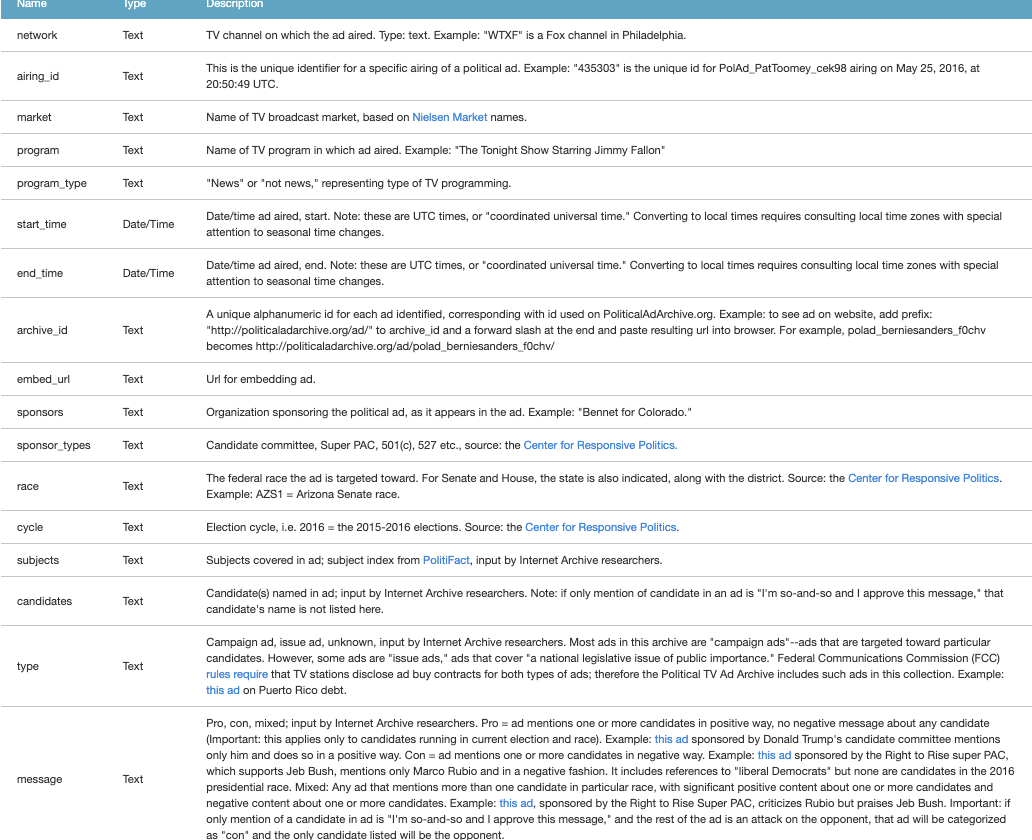

In [116]:
# description of columns

from PIL import Image
im = Image.open("metadata.png")
im.show()

In [131]:
data = raw_data.copy()
data.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32


### Create duration column (end-start time)

In [132]:
start_series = data.start_time
end_series = data.end_time

# duration_days = []
# for i in range(len(start_series)):
#     start = start_series.iloc[i]
#     end = end_series.iloc[i]
#     start_date = datetime(int(start[:4]), int(start[5:7]), int(start[8:10]), int(start[11:13]), int(start[14:16]), int(start[17:19]))
#     end_date = datetime(int(end[:4]), int(end[5:7]), int(end[8:10]), int(end[11:13]), int(end[14:16]), int(end[17:19]))
#     delta = end_date - start_date
#     duration_days.append(delta.days+1)
# data['duration_days'] = duration_days


duration_seconds = []
for i in range(len(start_series)):
    start = start_series.iloc[i]
    end = end_series.iloc[i]
    start_date = datetime(int(start[:4]), int(start[5:7]), int(start[8:10]), int(start[11:13]), int(start[14:16]), int(start[17:19]))
    end_date = datetime(int(end[:4]), int(end[5:7]), int(end[8:10]), int(end[11:13]), int(end[14:16]), int(end[17:19]))
    delta = end_date - start_date
    duration_seconds.append(delta.seconds)
data['duration_seconds'] = duration_seconds

### Drop unnecessary columns (delete id, wp_identifier, archive_id, cycle,race)

In [133]:
# variables we don't want:
# id, wp_identifier, archive_id, embed_url, race, cycle, start_time, end_time

data = data.drop(['id', 'wp_identifier', 'archive_id', 'embed_url', 'race', 'cycle'], axis=1)

### Trim down dataset to ads before 11/2016

In [8]:
# only keep ads that run before the election date

data = data.query('start_time <= "2016-11-08" and end_time <= "2016-11-08"')
print(len(data))
data.head()

370965


,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,type,message,date_created,duration_seconds
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30


### Create a "state" column to allow for joining with voter registration data: 

In [9]:
# import regex as re

# Create a column for the state based on the location column: 
data['state'] = data['location'].str.rsplit(',').str[-1]

# Make sure state abbreviations are formatted correct 
data['state'].replace({' Iowa':"IA", " Ohio":"OH", " NV": "NV", "  NC":"NC", " FL": "FL", " PA": "PA", " CO": "CO", " WI": "WI", " CA": "CA",
              " AZ": "AZ", " NH": "NH", " MD": "MD", " NY": "NY", " OH": "OH", " NC": "NC", " SC": "SC", " VA": "VA"}, inplace=True)
data['state'].value_counts()

IA    55115
NH    50393
NV    47560
PA    43736
FL    31063
NC    29909
OH    27003
CA    20676
WI    14690
AZ    12582
MD    12231
CO    12133
SC    10870
NY     2013
VA      968
Name: state, dtype: int64

In [10]:
data.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,type,message,date_created,duration_seconds,state
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NC
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,FL
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV


### Voter registration data: clean and join to data

In [11]:
# After manually cleaning up the excel dataset to convert to a readable csv format, set the column names to the appropriate labels and remove the extra column names in the first row of the dataframe
voter_data = pd.read_csv('voter_data.csv')
voter_data.columns = voter_data.iloc[0]
voter_data = voter_data.drop(0)
voter_data.head()

,state,total_pop,total_citizen_pop,total_reg,total_percent_reg,margin_error_reg,percent_citizen_reg,margin_error_citizen_reg,total_voted,percent_voted,margin_error_voted,percent_citizen_voted,margin_error_citizen_voted,NaN,NaN,NaN,NaN,NaN,NaN
1,UNITED STATES,"245,502","224,059","157,596",64.2,0.3,70.3,0.3,"137,537",56.0,0.3,61.4,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,"3,717","3,651","2,526",68.0,2.5,69.2,2.5,"2,095",56.4,2.7,57.4,2.7,NaN,NaN,NaN,NaN,NaN,NaN
3,ALASKA,518,502,358,69.1,2.6,71.3,2.6,308,59.4,2.8,61.3,2.8,NaN,NaN,NaN,NaN,NaN,NaN
4,ARIZONA,"5,196","4,585","3,145",60.5,2.2,68.6,2.3,"2,769",53.3,2.3,60.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN
5,ARKANSAS,"2,216","2,116","1,456",65.7,2.7,68.8,2.6,"1,241",56.0,2.8,58.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
voter_data.columns

Index([                     'state',                  'total_pop',
                'total_citizen_pop',                  'total_reg',
                'total_percent_reg',           'margin_error_reg',
              'percent_citizen_reg',   'margin_error_citizen_reg',
                      'total_voted',              'percent_voted',
               'margin_error_voted',      'percent_citizen_voted',
       'margin_error_citizen_voted',                          nan,
                                nan,                          nan,
                                nan,                          nan,
                                nan],
      dtype='object', name=0)

In [13]:
# Clean voter registration dataset
#drop NaN columns and columns that aren't useful to our analysis 
 #Drop: ( 'total_citizen_pop','margin_error_reg', 'percent_citizen_reg', 'margin_error_citizen_reg', 'margin_error_voted',  'percent_citizen_voted', 'margin_error_citizen_voted')
voter_data = voter_data[['state', 'total_pop','total_reg', 'total_percent_reg', 'total_voted', 'percent_voted']]
voter_data

,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
1,UNITED STATES,"245,502","157,596",64.2,"137,537",56.0
2,ALABAMA,"3,717","2,526",68.0,"2,095",56.4
3,ALASKA,518,358,69.1,308,59.4
4,ARIZONA,"5,196","3,145",60.5,"2,769",53.3
5,ARKANSAS,"2,216","1,456",65.7,"1,241",56.0
6,CALIFORNIA,"29,894","16,096",53.8,"14,416",48.2
7,COLORADO,"4,242","2,893",68.2,"2,707",63.8
8,CONNECTICUT,"2,759","1,763",63.9,"1,586",57.5
9,DELAWARE,729,487,66.8,417,57.2
10,DISTRICT OF COLUMBIA,553,420,75.9,380,68.7


In [14]:
#Add State Name variable where first letter is capitalized
voter_data['state_name'] = [voter_data['state'][i].capitalize() for i in np.arange(1,len(voter_data)+1)]
voter_data.tail(10)

,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_name
43,SOUTH DAKOTA,631,437,69.3,362,57.3,South dakota
44,TENNESSEE,"5,057","3,251",64.3,"2,630",52.0,Tennessee
45,TEXAS,"20,172","11,724",58.1,"9,626",47.7,Texas
46,UTAH,"2,096","1,398",66.7,"1,234",58.9,Utah
47,VERMONT,500,351,70.2,305,61.0,Vermont
48,VIRGINIA,"6,343","4,399",69.4,"3,973",62.6,Virginia
49,WASHINGTON,"5,592","3,906",69.9,"3,382",60.5,Washington
50,WEST VIRGINIA,"1,434",913,63.6,723,50.4,West virginia
51,WISCONSIN,"4,465","3,323",74.4,"3,068",68.7,Wisconsin
52,WYOMING,436,304,69.7,277,63.5,Wyoming


In [15]:
#Convert state column to state abbreviation to join to original dataset
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New hampshire': 'NH',
    'New jersey': 'NJ',
    'New mexico': 'NM',
    'New york': 'NY',
    'North carolina': 'NC',
    'North dakota': 'ND',
    'Northern mariana islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto rico': 'PR',
    'Rhode island': 'RI',
    'South carolina': 'SC',
    'South dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'United states': 'USA'
}

codes = [state_codes[voter_data['state_name'][i]] for i in np.arange(1,len(voter_data)+1)]
voter_data['state'] = codes
voter_data = voter_data.drop('state_name', axis=1)
voter_data

,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
1,USA,"245,502","157,596",64.2,"137,537",56.0
2,AL,"3,717","2,526",68.0,"2,095",56.4
3,AK,518,358,69.1,308,59.4
4,AZ,"5,196","3,145",60.5,"2,769",53.3
5,AR,"2,216","1,456",65.7,"1,241",56.0
6,CA,"29,894","16,096",53.8,"14,416",48.2
7,CO,"4,242","2,893",68.2,"2,707",63.8
8,CT,"2,759","1,763",63.9,"1,586",57.5
9,DE,729,487,66.8,417,57.2
10,DC,553,420,75.9,380,68.7


### Join original ad table with voter registration data

In [16]:
# Standadized and then join ad table with voter registration data, priorizing data for the entries in the advertisements dataframe
data['state'] = data['state'].str.upper()
joined = data.merge(voter_data, how='left', on='state')
joined.reset_index(drop=True, inplace=True)

joined.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,type,message,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,"2,234","1,371",61.4,"1,195",53.5
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NC,"7,631","5,194",68.1,"4,700",61.6
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,"2,234","1,371",61.4,"1,195",53.5
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,FL,"16,202","9,604",59.3,"8,578",52.9
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,"2,234","1,371",61.4,"1,195",53.5


In [17]:
#Make sure columns of joined are the correct data type
joined['total_pop'] = joined['total_pop'].str.replace(',', '') 
joined['total_reg'] = joined['total_reg'].str.replace(',', '') 
joined['total_voted'] = joined['total_voted'].str.replace(',', '') 

joined['total_pop'] = pd.to_numeric(joined['total_pop'])
joined['total_reg'] = pd.to_numeric(joined['total_reg'])
joined['total_percent_reg'] = pd.to_numeric(joined['total_percent_reg'])
joined['total_voted'] = pd.to_numeric(joined['total_voted'])
joined['percent_voted'] = pd.to_numeric(joined['percent_voted'])

In [18]:
joined.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,type,message,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5


### Classify states as swing, democratic (dem), or republican(rep)

In [19]:
joined['state'].value_counts()
swing_states = ['PA', 'NH', 'WI', 'VA', 'FL','NV', 'NV', 'CO', 'NC', 'AZ', 'OH', 'IA']
dem_states = ['CA', 'NY', 'MD']
rep_states = ['SC']

joined['state_swing'] = ['swing' if joined['state'][i] in swing_states else 'dem' if joined['state'][i] in dem_states else 'rep' for i in range(len(joined))]

In [20]:
joined

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,message,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370960,KWWL,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Dateline NBC,news,2016-01-09 02:09:27 UTC,2016-01-09 02:09:57 UTC,Rand Paul for President,Candidate Committee,"Government Efficiency, Taxes, Government regul...",Rand Paul,...,pro,2017-05-04 16:37:54,30,IA,2394.0,1657.0,69.2,1454.0,60.7,swing
370961,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Dateline NBC,news,2016-01-10 01:55:06 UTC,2016-01-10 01:55:36 UTC,Rand Paul for President,Candidate Committee,"Government Efficiency, Taxes, Government regul...",Rand Paul,...,pro,2017-05-04 16:37:54,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing
370962,WIS,"Columbia, SC",Dateline NBC,news,2016-01-10 01:23:51 UTC,2016-01-10 01:24:21 UTC,Rand Paul for President,Candidate Committee,"Government Efficiency, Taxes, Government regul...",Rand Paul,...,pro,2017-05-04 16:37:54,30,SC,3733.0,2575.0,69.0,2233.0,59.8,rep
370963,KTIV,"Sioux City, Iowa",Dateline NBC,news,2016-01-16 03:35:23 UTC,2016-01-16 03:35:53 UTC,Rand Paul for President,Candidate Committee,"Government Efficiency, Taxes, Government regul...",Rand Paul,...,pro,2017-05-04 16:37:54,30,IA,2394.0,1657.0,69.2,1454.0,60.7,swing


### Drop Null Values

In [21]:
joined = joined.dropna()
joined.shape

(322474, 21)

### Filter to only Trump & Clinton

In [22]:
joined = joined.query("candidates == 'Donald Trump' or candidates == 'Hillary Clinton'")
joined.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,message,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,pro,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing


### Create Column with 2016 Election Results

In [23]:
winners = {'PA': 'Donald Trump', 'NH': 'Hillary Clinton', 'WI':'Donald Trump', 'VA': 'Hillary Clinton', 'NV': 'Hillary Clinton', 'CO': 'Hillary Clinton', 'NC': 'Donald Trump',
          'AZ': 'Donald Trump', 'OH': 'Donald Trump', 'IA': 'Donald Trump', 'CA': 'Hillary Clinton', 'NY': 'Hillary Clinton', 'MD': 'Hillary Clinton', 'SC': 'Donald Trump', 'FL': 'Donald Trump'}
winner_df = pd.DataFrame.from_dict(winners, orient = 'index').reset_index().rename(columns={0:'winner', 'index':'state'})
winner_df

joined = joined.merge(winner_df, on= 'state', how = 'left')

In [24]:
joined.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton


In [25]:
joined['message'].value_counts()

con        52646
pro        40960
unknown     6903
mixed        498
Name: message, dtype: int64

### Export to csv: winner column added, candidates are Trump & Clinton, swing state column added, no filter on message

In [26]:
#Run this to export cleaned dataset as csv
joined.query("candidates == 'Donald Trump' or candidates == 'Hillary Clinton'").to_csv('joined_message_unfiltered.csv')

### Correlation, slope between number of ads and percent voted/registration (should this section be in EDA?)

In [27]:
# correlation

grouped = joined[joined.state_swing == 'swing'].groupby('state').agg({'state': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
print('Swing States Correlation between ad number and total_percent_reg/percent_voted')
print(grouped.state.corr(grouped.total_percent_reg))
print(grouped.state.corr(grouped.percent_voted))
print()
print('Non-Swing States Correlation between ad number and total_percent_reg/percent_voted')
grouped = joined[joined.state_swing != 'swing'].groupby('state').agg({'state': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
print(grouped.state.corr(grouped.total_percent_reg))
print(grouped.state.corr(grouped.percent_voted))

Swing States Correlation between ad number and total_percent_reg/percent_voted
-0.24875166663710765
-0.37496042704763133

Non-Swing States Correlation between ad number and total_percent_reg/percent_voted
-0.7563989416201855
-0.674587445557587


In [28]:
# slope
from scipy import stats


print('Swing States Slope between ad number and total_percent_reg and percent_voted')
grouped = joined[joined.state_swing == 'swing'].groupby('state').agg({'state': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
slopeR = stats.linregress(grouped.state, grouped.total_percent_reg)
slopeR = slopeR[0]
print(slopeR)
slopeR = stats.linregress(grouped.state, grouped.percent_voted)
slopeR = slopeR[0]
print(slopeR)

print()
print('Non-Swing States Slope between ad number and total_percent_reg and percent_voted')
grouped = joined[joined.state_swing != 'swing'].groupby('state').agg({'state': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
slopeR = stats.linregress(grouped.state, grouped.total_percent_reg)
slopeR = slopeR[0]
print(slopeR)
slopeR = stats.linregress(grouped.state, grouped.percent_voted)
slopeR = slopeR[0]
print(slopeR)

Swing States Slope between ad number and total_percent_reg and percent_voted
-0.0002458205818382776
-0.00039777827321745506

Non-Swing States Slope between ad number and total_percent_reg and percent_voted
-0.0012081570279083124
-0.0008895774249343828


In [29]:
joined['message']

0         pro
1         pro
2         pro
3         pro
4         pro
         ... 
101002    con
101003    con
101004    con
101005    con
101006    con
Name: message, Length: 101007, dtype: object

In [30]:
# average ad duration between 2 main candidates
joined.query("candidates == 'Donald Trump' or candidates == 'Hillary Clinton'").groupby(['state', 'candidates']).agg({'state': 'count', 'duration_seconds': 'mean', 'total_percent_reg': 'first', 'percent_voted': 'first'})

state 
 duration_seconds 
 total_percent_reg 
 percent_voted 
 
 
 state 
 candidates 
 
 
 
 
 
 
 
 
 AZ 
 Donald Trump 
 1813 
 32.812466 
 60.5 
 53.3 
 
 
 Hillary Clinton 
 780 
 31.326923 
 60.5 
 53.3 
 
 
 CA 
 Donald Trump 
 6560 
 38.901829 
 53.8 
 48.2 
 
 
 Hillary Clinton 
 3362 
 43.858715 
 53.8 
 48.2 
 
 
 CO 
 Donald Trump 
 2064 
 34.156492 
 68.2 
 63.8 
 
 
 Hillary Clinton 
 2103 
 32.758916 
 68.2 
 63.8 
 
 
 FL 
 Donald Trump 
 9012 
 31.809143 
 59.3 
 52.9 
 
 
 Hillary Clinton 
 3649 
 32.015621 
 59.3 
 52.9 
 
 
 IA 
 Donald Trump 
 5641 
 31.535543 
 69.2 
 60.7 
 
 
 Hillary Clinton 
 10627 
 36.899031 
 69.2 
 60.7 
 
 
 MD 
 Donald Trump 
 538 
 32.513011 
 67.3 
 59.2 
 
 
 Hillary Clinton 
 232 
 46.728448 
 67.3 
 59.2 
 
 
 NC 
 Donald Trump 
 4171 
 31.366819 
 68.1 
 61.6 
 
 
 Hillary Clinton 
 3790 
 33.886280 
 68.1 
 61.6 
 
 
 NH 
 Donald Trump 
 2947 
 32.777740 
 73.1 
 66.9 
 
 
 Hillary Clinton 
 4779 
 31.643231 
 73.1 
 66.9 
 
 
 NV 
 Donald Trump 
 6124 
 32.672763 
 61.4 
 53.5 
 
 
 Hillary Clinton 
 6852 
 34.251022 
 61.4 
 53.5 
 
 
 NY 
 Donald Trump 
 51 
 53.196078 
 59.0 
 50.7 
 
 
 Hillary Clinton 
 689 
 30.354136 
 59.0 
 50.7 
 
 
 OH 
 Donald Trump 
 5114 
 33.088189 
 69.5 
 61.4 
 
 
 Hillary Clinton 
 4736 
 34.487753 
 69.5 
 61.4 
 
 
 PA 
 Donald Trump 
 6719 
 32.074713 
 69.2 
 60.2 
 
 
 Hillary Clinton 
 3820 
 33.349476 
 69.2 
 60.2 
 
 
 SC 
 Donald Trump 
 346 
 31.315029 
 69.0 
 59.8 
 
 
 Hillary Clinton 
 1167 
 36.139674 
 69.0 
 59.8 
 
 
 VA 
 Donald Trump 
 2 
 60.000000 
 69.4 
 62.6 
 
 
 Hillary Clinton 
 340 
 31.379412 
 69.4 
 62.6 
 
 
 WI 
 Donald Trump 
 1372 
 33.640671 
 74.4 
 68.7 
 
 
 Hillary Clinton 
 1607 
 31.192906 
 74.4 
 68.7

### Drop unknowns, mixed, mix from message column (no longer need)?

In [31]:
# only keep message == pro or con

joined = joined.query("message == 'pro' or message == 'con'")

# EDA

Questions to answer:
- Distribution of ads in swing states; ad topics; sponsor types (bar chart)
- Percentage of candidate ads in swing states; whether ads were from the news or non-news channels (pie chart)
- Start times/end times - What was most popular among candidates? (histogram)
- Correlations between variables (scatterplot)
- Number of ads relative to the population (heatmap)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Jeremy will delete this

df = pd.read_csv('joined_message_unfiltered.csv')

In [17]:
# TODO: change dataset to cleaned dataset
raw_data = pd.read_csv('Aired_Ads.csv')
raw_data.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32


In [18]:
# temporary data cleaning, can delete after importing cleaned dataset
data = raw_data.drop(['id', 'wp_identifier', 'archive_id', 'embed_url', 'race', 'cycle', 'start_time', 'end_time'], axis=1)
data = data.dropna()
data = data.query("message == 'pro' or message == 'con'")
data = data.query("candidates == 'Donald Trump' or candidates == 'Hillary Clinton'")
print(data.shape)
data.head()

(95412, 11)


,network,location,program,program_type,sponsors,sponsor_types,subjects,candidates,type,message,date_created
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,KLAS,"Las Vegas, NV",Face the Nation,news,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32


In [19]:
# note: there are more "pro" ads for Clinton, more "con" ads for Trump

print(data[data.message == 'pro'].candidates.value_counts())
print()
print(data[data.message == 'con'].candidates.value_counts())

Hillary Clinton    30525
Donald Trump       10722
Name: candidates, dtype: int64

Donald Trump       40447
Hillary Clinton    13718
Name: candidates, dtype: int64


### Distribution of ads in swing states; ad topics; sponsor types (bar chart)

In [20]:
# bar plot of swing states
# need STATE column first using regex

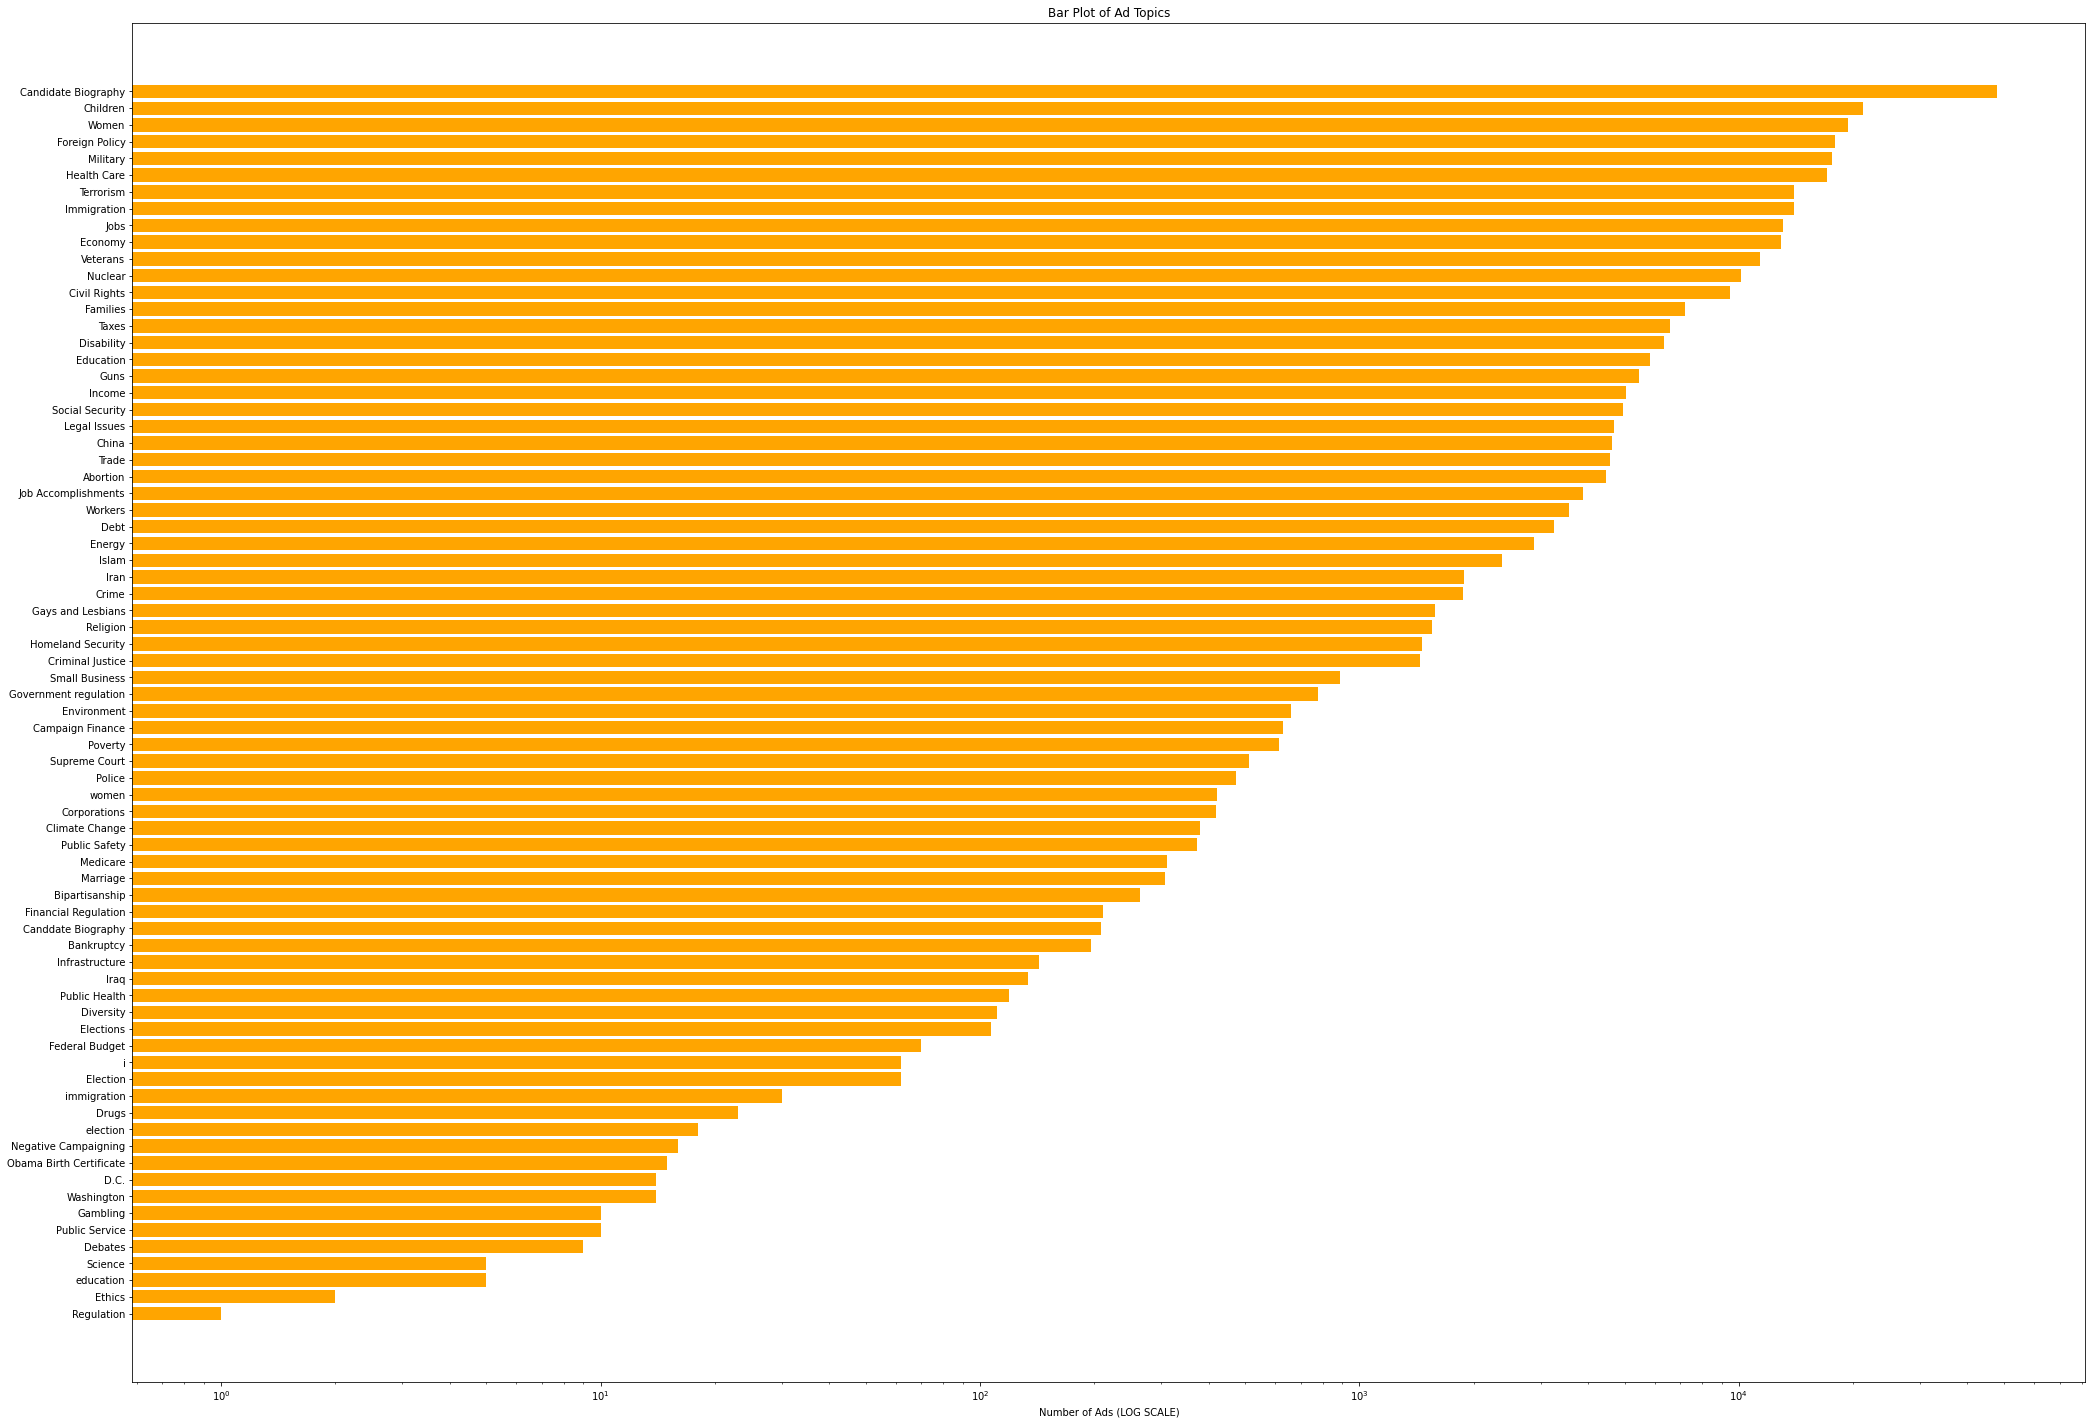

In [27]:
# bar plot of ad topics

all_subjects = set()
for subject_line in data.subjects.unique():
    subject_list = str(subject_line).split(', ')
    for subject in subject_list:
        all_subjects.add(subject)

subject_dict = {subject: 0 for subject in all_subjects}
for subject_line in data.subjects.values:
    subject_list = str(subject_line).split(', ')
    for subject in subject_list:
        subject_dict[subject] += 1

sorted_subject_dict = {k: v for k, v in sorted(subject_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(35, 25))
plt.barh(list(sorted_subject_dict.keys()), sorted_subject_dict.values(), color='orange')
plt.title('Bar Plot of Ad Topics')
plt.xlabel('Number of Ads (LOG SCALE)')
plt.xscale('log')
plt.show()

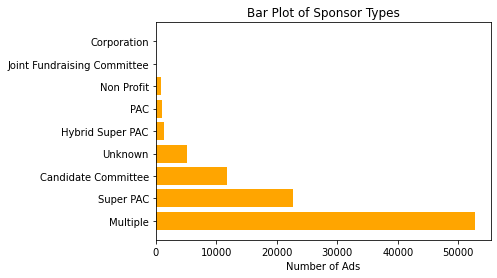

In [28]:
# bar plot of sponsor types

sponsor_types_vc = data.sponsor_types.value_counts()
labels = list(sponsor_types_vc.index)
plt.barh(labels, sponsor_types_vc.values, color='orange')
plt.title('Bar Plot of Sponsor Types')
plt.xlabel('Number of Ads')
plt.show()

### Percentage of candidate ads in swing states; whether ads were from the news or non-news channels (pie chart)

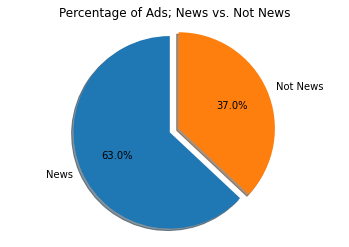

In [17]:
# news vs non-news pie chart

prog_type = data.program_type.values
labels = 'News', 'Not News'
sizes = [np.count_nonzero(prog_type == 'news'), np.count_nonzero(prog_type == 'not news')]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Ads; News vs. Not News')
plt.show()

### Percentage of pro versus con ads in swing states (pie chart)

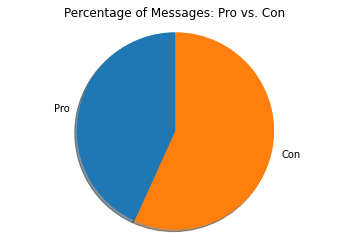

In [18]:
# Pie chart for message polarity:
polarity = data.message.values
labels = 'Pro', 'Con'
sizes = [np.count_nonzero(polarity == 'pro'), np.count_nonzero(polarity == 'con')]
# Only "explode" the 2nd slice
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle:
ax1.axis('equal')  
plt.title('Percentage of Messages: Pro vs. Con')
plt.show()

Distribution of Ad Duration Among Candidates

In [19]:
#TODO: Correlations between variables (scatterplot)
data = pd.read_csv('cleaned_data.csv')

data["message_polarity"] = data['message'].replace({'pro': 1, "con": 0}, inplace=True)

by_candidate = data.groupby('candidates').mean()
by_candidate["message_polarity"] = data['message']
by_candidate.head()

# # Association between the duration of ads and their polarity:
# a = sns.scatterplot(x="duration_seconds", y="message_polarity", data=by_candidate)
# a.set_title("Ad Polarity vs. Ad Duration")
# a.set_xlabel("Duration (in seconds)")
# a.set_ylabel("Ad Polarity (Pro-Candidate)")
data.head()

,Unnamed: 0,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,message_polarity
0,0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,None
1,1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,None
2,2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,None
3,3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,None
4,4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,None


In [20]:
#TODO: Correlations between variables (scatterplot)
# data = pd.read_csv('cleaned_data.csv')
data = pd.read_csv('cleaned_data.csv')

data["message_polarity"] = data['message'].replace({'pro': 1, "con": 0})
by_candidate = data.groupby('candidates').mean()#agg({'message_polarity': 'mean'})
by_candidate.head()

,Unnamed: 0,duration_seconds,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,message_polarity
candidates,,,,,,,,
Donald Trump,188043.580233,32.148605,7642.624037,4922.486886,66.054479,4372.818073,58.707202,0.218050
Hillary Clinton,158656.616680,34.602012,5817.054640,3845.030987,67.446428,3418.653535,60.044765,0.714278


Associations between quantitative variables: 

                    Unnamed: 0  duration_seconds    total_pop    total_reg  \
candidates                                                                   
Donald Trump     188043.580233         32.148605  7642.624037  4922.486886   
Hillary Clinton  158656.616680         34.602012  5817.054640  3845.030987   

                 total_percent_reg  total_voted  percent_voted  \
candidates                                                       
Donald Trump             66.054479  4372.818073      58.707202   
Hillary Clinton          67.446428  3418.653535      60.044765   

                 message_polarity  
candidates                         
Donald Trump             0.218050  
Hillary Clinton          0.714278  


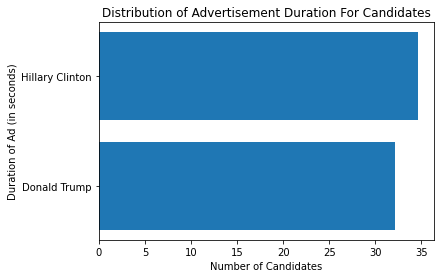

In [21]:
# End times - start times: What was most popular duration among candidates? (Histogram)
print(by_candidate)
plt.barh(by_candidate.index, by_candidate['duration_seconds'])
plt.title("Distribution of Advertisement Duration For Candidates")
plt.xlabel("Number of Candidates")
plt.ylabel("Duration of Ad (in seconds)")

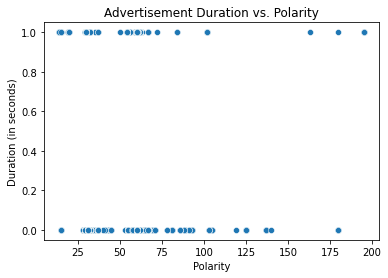

In [44]:

# Association between the number of ads and their duration: 

b = sns.scatterplot(x='duration_seconds', y='message_polarity', data = data)
b.set_title("Advertisement Duration vs. Polarity")
b.set_xlabel("Polarity")
b.set_ylabel("Duration (in seconds)")

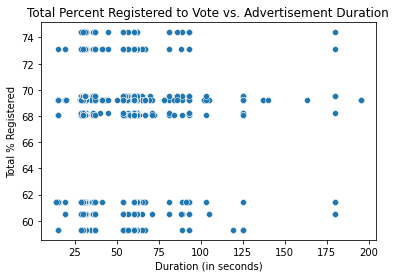

In [45]:
b = sns.scatterplot(x='duration_seconds', y='total_percent_reg', data = data)
b.set_title("Total Percent Registered to Vote vs. Advertisement Duration")
b.set_xlabel("Duration (in seconds)")
b.set_ylabel("Total % Registered")

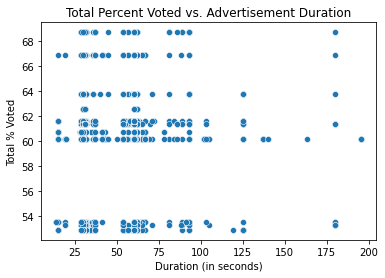

In [46]:
b = sns.scatterplot(x='duration_seconds', y='percent_voted', data = data)
b.set_title("Total Percent Voted vs. Advertisement Duration")
b.set_xlabel("Duration (in seconds)")
b.set_ylabel("Total % Voted") 

Number of ads relative to the population

In [47]:
#TODO: Number of ads relative to the population (Heatmap)
data.head()
# sns.heatmap(data)

,Unnamed: 0,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,message_polarity
0,0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,1
1,1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,1
2,2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,1
3,3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,1
4,4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,1


# Descriptive Analysis Techniques

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [135]:
raw_data = pd.read_csv('joined_message_unfiltered.csv').drop(columns="Unnamed: 0")
joined = raw_data.copy()
joined.head()

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton


### Investigating Unique Ads about each Candidate in Swing States
Sub-question: In the 2016 election, did more ads for each candidate help them win the election in swing states?

In [136]:
#Check if there are repeated rows in joined dataset -- if True, then there are none
unique = joined.drop_duplicates(keep='first')
len(unique) == len(joined)

True

In [137]:
#Only investigate swing states for this question, since non-swing state winners are usually pre-determined already
only_swing = joined[joined['state_swing'] == 'swing']
only_swing

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100992,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",Today,news,2016-02-16 15:59:32 UTC,2016-02-16 16:00:32 UTC,Cruz for President,Candidate Committee,Legal Issues,Donald Trump,...,2017-05-04 16:30:44,60,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
100993,WYFF,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",WYFF News 4 7am Saturday,news,2016-02-13 12:39:37 UTC,2016-02-13 12:40:37 UTC,Cruz for President,Candidate Committee,Legal Issues,Donald Trump,...,2017-05-04 16:30:44,60,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
100996,WLOS,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",News 13 at Noon,news,2016-02-17 17:09:12 UTC,2016-02-17 17:10:12 UTC,Cruz for President,Candidate Committee,Legal Issues,Donald Trump,...,2017-05-04 16:30:44,60,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
101000,WSPA,"Greenville-Spartanburg, SC/Asheville-Anderson, NC",7 On Your Side at 5pm,news,2016-02-16 22:27:13 UTC,2016-02-16 22:28:13 UTC,Cruz for President,Candidate Committee,Legal Issues,Donald Trump,...,2017-05-04 16:30:44,60,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump


In [138]:
#List of States
states = list(only_swing['state'].unique())
states

['NV', 'NC', 'FL', 'OH', 'IA', 'PA', 'CO', 'WI', 'AZ', 'NH', 'VA']

In [139]:
#Creating dataset to compare unique ads between candidates
unique_ads = only_swing.groupby(['state', 'candidates']).count()[['network']]
unique_ads = unique_ads.rename(columns={'network':'unique_count'}).reset_index()
unique_ads.head()

,state,candidates,unique_count
0,AZ,Donald Trump,1813
1,AZ,Hillary Clinton,780
2,CO,Donald Trump,2064
3,CO,Hillary Clinton,2103
4,FL,Donald Trump,9012


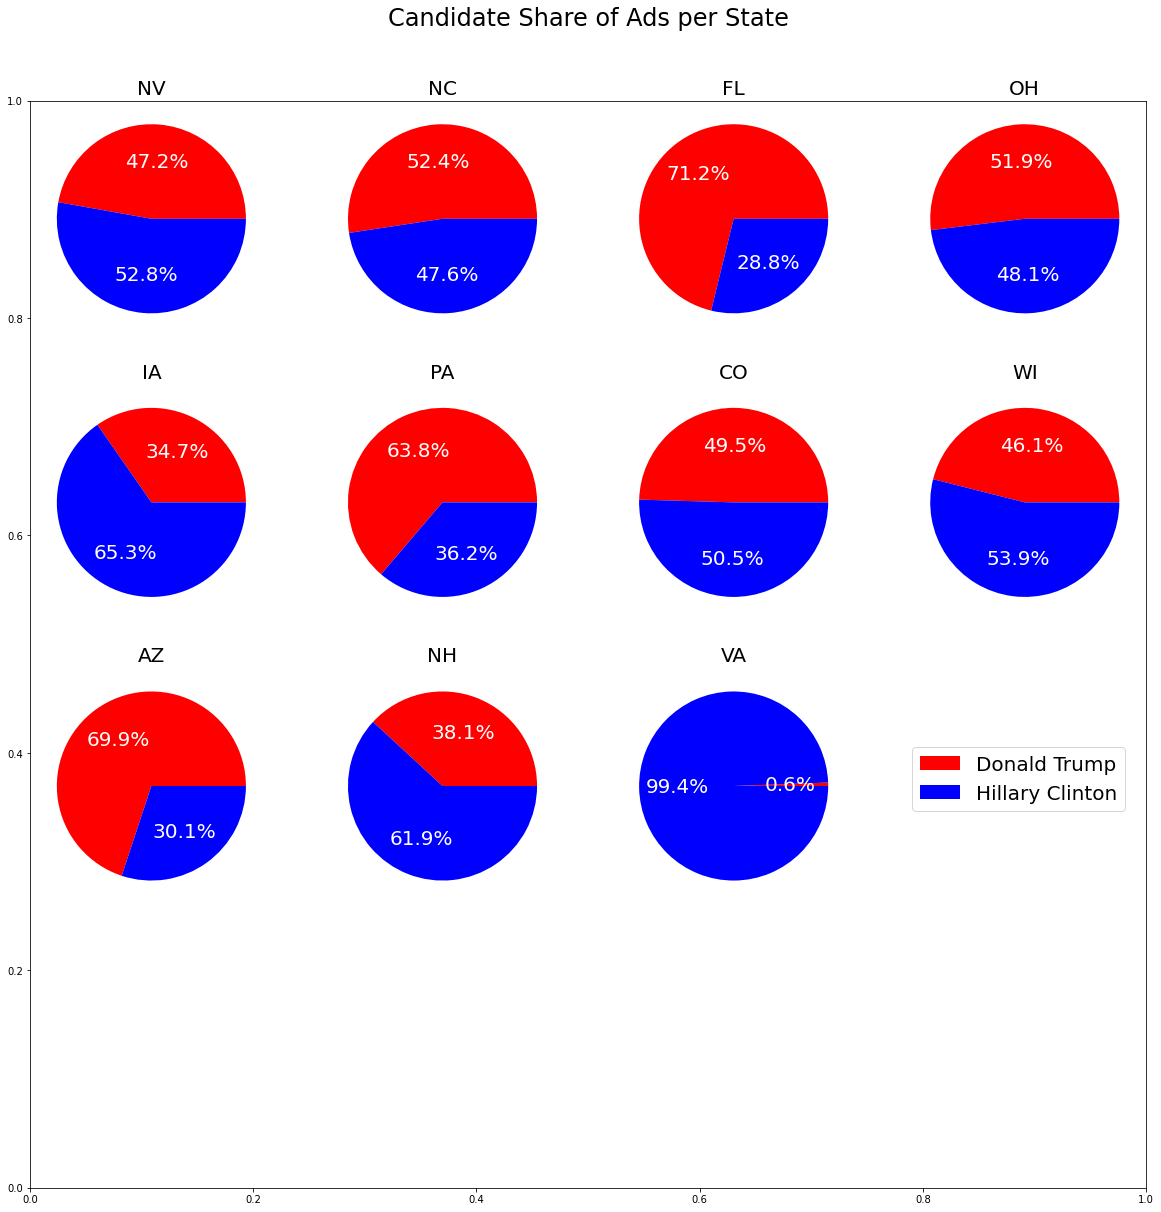

In [140]:
#Plot to visualize each candidate's ad share per swing state
fig = plt.figure(figsize=(20,20))
plt.title('Candidate Share of Ads per State', fontsize = 24, pad=75)

num=1
for i in states:
    fig.add_subplot(4,4,num)
    plt.pie(unique_ads[unique_ads['state'] == i]['unique_count'], colors = ['red', 'blue'],autopct='%.1f%%',
       textprops={'fontsize': 20, 'color': 'white'})
    plt.title(i, fontsize= 20)
    num +=1

plt.legend(unique_ads[unique_ads['state'] == i]['candidates'], bbox_to_anchor=(2.2, .35), loc = 'lower right', fontsize = 20)
plt.show()


In [141]:
#Jeremy will delete this (maybe)
def Insert_row(row_number, df, row_value):
    # Starting value of upper half
    start_upper = 0
   
    # End value of upper half
    end_upper = row_number
   
    # Start value of lower half
    start_lower = row_number
   
    # End value of lower half
    end_lower = df.shape[0]
   
    # Create a list of upper_half index
    upper_half = [*range(start_upper, end_upper, 1)]
   
    # Create a list of lower_half index
    lower_half = [*range(start_lower, end_lower, 1)]
   
    # Increment the value of lower half by 1
    lower_half = [x.__add__(1) for x in lower_half]
   
    # Combine the two lists
    index_ = upper_half + lower_half
   
    # Update the index of the dataframe
    df.index = index_
   
    # Insert a row at the end
    df.loc[row_number] = row_value
    
    # Sort the index labels
    df = df.sort_index()
   
    # return the dataframe
    return df


In [142]:
    
pro_duration = only_swing[only_swing.message == 'pro'].groupby(['state', 'candidates']).sum()[['duration_seconds']]
pro_duration.reset_index(inplace = True)
pro_duration = Insert_row(18, pro_duration, ['VA', 'Donald Trump', 0])
pro_duration

,state,candidates,duration_seconds
0,AZ,Donald Trump,1968
1,AZ,Hillary Clinton,14944
2,CO,Donald Trump,17046
3,CO,Hillary Clinton,43026
4,FL,Donald Trump,30160
5,FL,Hillary Clinton,57667
6,IA,Donald Trump,89640
7,IA,Hillary Clinton,310583
8,NC,Donald Trump,19089
9,NC,Hillary Clinton,102881


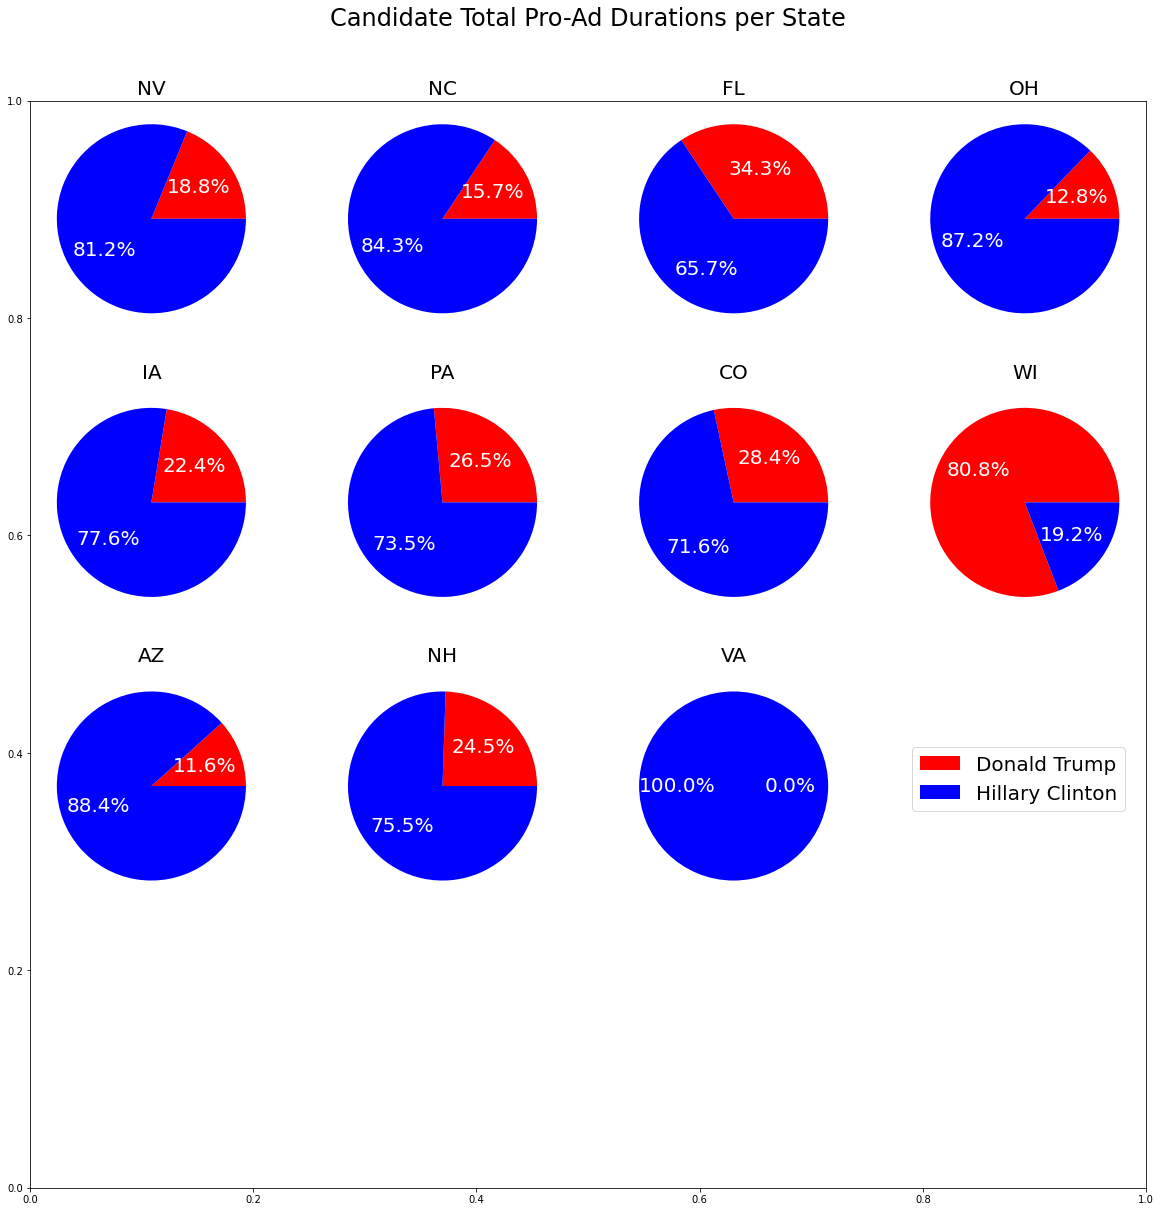

In [143]:
fig = plt.figure(figsize=(20,20))
plt.title('Candidate Total Pro-Ad Durations per State', fontsize = 24, pad=75)

num=1
for i in states:
    fig.add_subplot(4,4,num)
    plt.pie(pro_duration[pro_duration['state'] == i]['duration_seconds'], colors = ['red', 'blue'],autopct='%.1f%%',
       textprops={'fontsize': 20, 'color': 'white'})
    plt.title(i, fontsize= 20)
    num +=1

plt.legend(pro_duration[unique_ads['state'] == i]['candidates'], bbox_to_anchor=(2.2, .35), loc = 'lower right', fontsize = 20)
plt.show()

In [144]:
con_duration = only_swing[only_swing.message == 'con'].groupby(['state', 'candidates']).sum()[['duration_seconds']]
con_duration.reset_index(inplace = True)
con_duration = Insert_row(19, con_duration, ['VA', 'Hillary Clinton', 0])
con_duration

,state,candidates,duration_seconds
0,AZ,Donald Trump,56426
1,AZ,Hillary Clinton,9491
2,CO,Donald Trump,52272
3,CO,Hillary Clinton,25836
4,FL,Donald Trump,256504
5,FL,Hillary Clinton,59098
6,IA,Donald Trump,87579
7,IA,Hillary Clinton,11482
8,NC,Donald Trump,111375
9,NC,Hillary Clinton,16938


18    120
19      0
Name: duration_seconds, dtype: int64


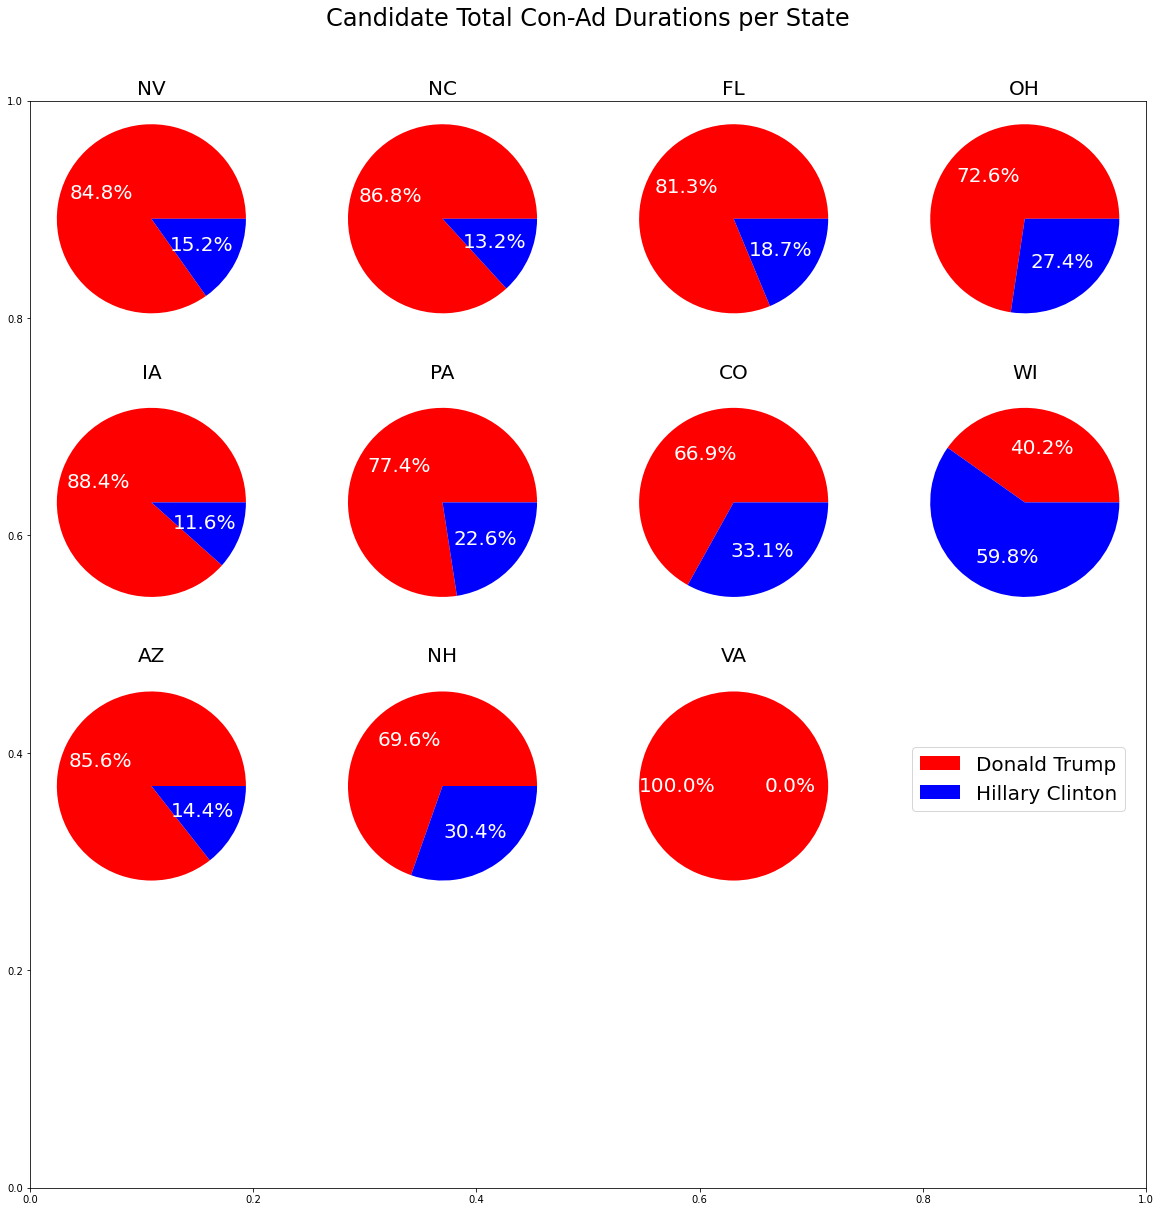

In [145]:
fig = plt.figure(figsize=(20,20))
plt.title('Candidate Total Con-Ad Durations per State', fontsize = 24, pad=75)

num=1
for i in states:
    if i=='VA':
        print(con_duration[con_duration['state'] == i]['duration_seconds'])
    fig.add_subplot(4,4,num)
    plt.pie(con_duration[con_duration['state'] == i]['duration_seconds'], colors = ['red', 'blue'],autopct='%.1f%%',
       textprops={'fontsize': 20, 'color': 'white'})
    plt.title(i, fontsize= 20)
    num +=1

plt.legend(unique_ads[unique_ads['state'] == i]['candidates'], bbox_to_anchor=(2.2, .35), loc = 'lower right', fontsize = 20)
plt.show()

In [146]:
raw_data.query("candidates == 'Donald Trump' and state == 'VA'").shape

(2, 22)

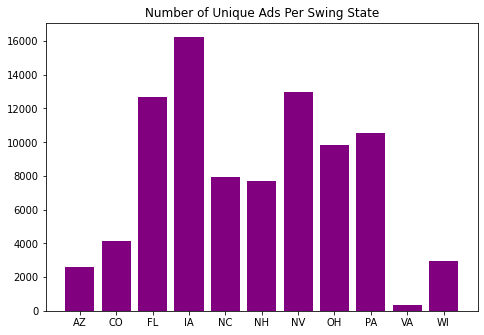

In [147]:
unique_ads = only_swing.groupby(['state', 'candidates']).count()[['network']]
unique_ads = unique_ads.rename(columns={'network':'unique_count'}).reset_index()
unique_ads.head()

total_ads = unique_ads.groupby('state').sum().reset_index()
total_ads

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x


ax.bar(total_ads['state'],total_ads['unique_count'], color = 'purple')
plt.title('Number of Unique Ads Per Swing State')
plt.show()

In [148]:
# Now that we know share of ads, let's compare that to whether each candidate won in each state

#Create dictionary of state: candidate with more ads in the state
more_ads = {}
for i in states:
    more_ads[i] = list(unique_ads[unique_ads['state'] == i][['candidates','unique_count']].sort_values('unique_count',ascending = False)['candidates'])[0]

#Put that column in a new dataframe for comparison
compare = pd.DataFrame.from_dict(more_ads, orient = 'index').reset_index().rename(columns={0:'more_ads', 'index':'state'})
compare


,state,more_ads
0,NV,Hillary Clinton
1,NC,Donald Trump
2,FL,Donald Trump
3,OH,Donald Trump
4,IA,Hillary Clinton
5,PA,Donald Trump
6,CO,Hillary Clinton
7,WI,Hillary Clinton
8,AZ,Donald Trump
9,NH,Hillary Clinton


In [149]:
#Creating more dataframes with columns to join
voting_pct_winner = joined[['state', 'percent_voted', 'total_percent_reg', 'winner']]
voting_pct_winner = voting_pct_winner.drop_duplicates(keep='first')
voting_pct_winner.reset_index(inplace=True, drop=True)


total_ads = unique_ads.groupby('state').sum().reset_index()

In [150]:
#Merge all Dataframes Together
compare = compare.merge(voting_pct_winner, on= 'state', how = 'left').merge(total_ads, on='state', how='left')
compare = compare.rename(columns={'unique_count':'unique_ads'})
compare

,state,more_ads,percent_voted,total_percent_reg,winner,unique_ads
0,NV,Hillary Clinton,53.5,61.4,Hillary Clinton,12976
1,NC,Donald Trump,61.6,68.1,Donald Trump,7961
2,FL,Donald Trump,52.9,59.3,Donald Trump,12661
3,OH,Donald Trump,61.4,69.5,Donald Trump,9850
4,IA,Hillary Clinton,60.7,69.2,Donald Trump,16268
5,PA,Donald Trump,60.2,69.2,Donald Trump,10539
6,CO,Hillary Clinton,63.8,68.2,Hillary Clinton,4167
7,WI,Hillary Clinton,68.7,74.4,Donald Trump,2979
8,AZ,Donald Trump,53.3,60.5,Donald Trump,2593
9,NH,Hillary Clinton,66.9,73.1,Hillary Clinton,7726


In [151]:
#Some Analysis
more_ads_win = len(compare[compare['more_ads'] == compare['winner']])
less_ads_win = len(compare) - more_ads_win
more_ads_win, less_ads_win

(9, 2)

In [152]:
print ('In swing states, the candidate with more ads about them won ' + str(round(more_ads_win/len(compare)*100, 2)) + '% of the time.')
print ('In swing states, the candidate with less ads about them won ' + str(round(less_ads_win/len(compare)*100, 2)) + '% of the time.')

In swing states, the candidate with more ads about them won 81.82% of the time.
In swing states, the candidate with less ads about them won 18.18% of the time.


In [153]:
compare[compare['more_ads'] == 'Donald Trump']
print ('In swing states that had more ads were about Donald Trump, he won ' + str(round(5/5* 100, 2)) + '% of the time.')

In swing states that had more ads were about Donald Trump, he won 100.0% of the time.


In [154]:
compare[compare['more_ads'] == 'Hillary Clinton']
print ('In swing states that had more ads were about Hillary Clinton, she won ' + str(round(4/6* 100, 2)) + '% of the time.')

In swing states that had more ads were about Hillary Clinton, she won 66.67% of the time.


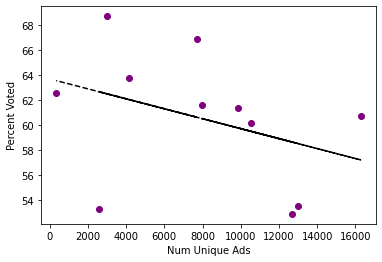

In [155]:
#Scatter plot between number of ads per state and percent that voted
plt.scatter(compare['unique_ads'], compare['percent_voted'], color = 'purple')
z = np.polyfit(compare['unique_ads'], compare['percent_voted'], 1)
p = np.poly1d(z)
plt.plot(compare['unique_ads'],p(compare['unique_ads']),"k--")
plt.xlabel('Num Unique Ads')
plt.ylabel('Percent Voted')
#plt.title("y=%.4fx+%.4f"%(z[0],z[1])) 

In [156]:
print(compare.unique_ads.corr(compare.percent_voted))

-0.3749604270476314


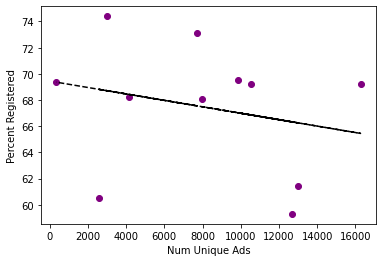

In [157]:
#Scatter plot between number of ads per state and percent that voted
plt.scatter(compare['unique_ads'], compare['total_percent_reg'], color = 'purple')
z = np.polyfit(compare['unique_ads'], compare['total_percent_reg'], 1)
p = np.poly1d(z)
plt.plot(compare['unique_ads'],p(compare['unique_ads']),"k--")
plt.xlabel('Num Unique Ads')
plt.ylabel('Percent Registered')
#plt.title("y=%.4fx+%.4f"%(z[0],z[1])) 

In [158]:
print(compare.unique_ads.corr(compare.total_percent_reg))

-0.2487516666371077


In [159]:
joined.head(11)

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
5,WTVT,"Tampa-St. Petersburg, FL",TMZ Live,not news,2016-08-30 19:55:14 UTC,2016-08-30 19:55:44 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
6,WTOG,"Tampa-St. Petersburg, FL",Justice for All With Cristina Perez,not news,2016-08-30 13:22:30 UTC,2016-08-30 13:23:00 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
7,WLFL,"Raleigh-Durham-Fayetteville, NC",The Flash,not news,2016-09-07 00:45:00 UTC,2016-09-07 00:45:30 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
8,WOIO,"Cleveland, Ohio",Cleveland 19 News at 6PM,news,2016-08-30 22:12:59 UTC,2016-08-30 22:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,OH,8811.0,6128.0,69.5,5408.0,61.4,swing,Donald Trump
9,WRAL,"Raleigh-Durham-Fayetteville, NC",Last Call With Carson Daly,not news,2016-08-30 05:53:01 UTC,2016-08-30 05:53:31 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump


### Evaluating Pro vs. Con Ads Per Swing State
Sub-question: In the 2016 election, did positive or negative message advertisements for each candidate increase the percentage of voter registration or the percentage of the population that actually voted in swing states?

In [115]:
# convert message column to numeric

# so here i will filter out the rows so they only contain pro or con
joined = raw_data.copy()
joined = joined.query("message == 'pro' or message == 'con'")
joined.replace({'message': {'pro': 1, 'con': 0}}, inplace=True)
joined.message.unique()
swing_states = joined[joined['state_swing'] == 'swing']
swing_states.head() 

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,2016-09-12 14:49:32,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton


In [116]:
grouped_states_pro = swing_states.groupby('state').sum()
grouped_states_pro.head()

,message,duration_seconds,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
state,,,,,,,
AZ,538,82829,13405680.0,8114100.0,156090.0,7144020.0,137514.0
CO,1811,138180,17612784.0,12011736.0,283166.4,11239464.0,264897.6
FL,2815,403429,205101118.0,121577036.0,750678.7,108588902.0,669661.1
IA,10889,499284,33456150.0,23156575.0,967070.0,20319650.0,848282.5
NC,3658,250283,58522139.0,39832786.0,522258.9,36044300.0,472410.4


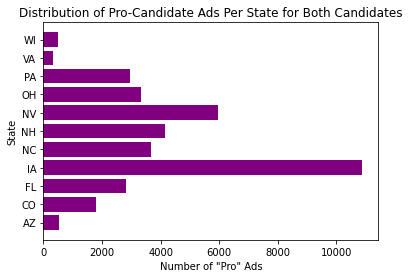

In [117]:
# Grouping the dataframe by state and visualizing the distribution of Pro-Candidate ads per state for both candidates (Clinton and Trump) combined: 
# Since pro corresponds to 1 and con corresponds to 0 as binary int values, we can aggregate by the sum to find the total number of pro messages: 

plt.barh(grouped_states_pro.index, grouped_states_pro['message'], color='purple')
plt.title('Distribution of Pro-Candidate Ads Per State for Both Candidates')
plt.ylabel('State') 
plt.xlabel('Number of "Pro" Ads') 
plt.show()

In [118]:
grouped_candidates_pro = swing_states.groupby('candidates').sum()
grouped_candidates_pro.head()

,message,duration_seconds,total_pop,total_reg,total_percent_reg,total_voted,percent_voted
candidates,,,,,,,
Donald Trump,9652,1423058,338300753.0,217893882.0,2.923902e+06,193562792.0,2.598674e+06
Hillary Clinton,27269,1321001,222077695.0,146791748.0,2.574902e+06,130513936.0,2.292329e+06


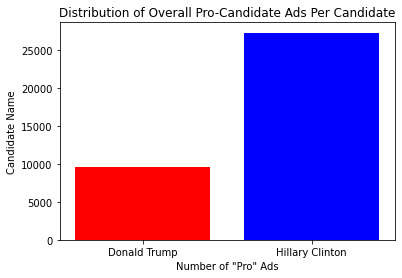

In [119]:
# Grouping the dataframe by candidate and visualizing the number of Pro-Candidate ads for each of the candidates (Clinton and Trump): 

plt.bar(grouped_candidates_pro.index, grouped_candidates_pro['message'], color=['red', 'blue'])
plt.title('Distribution of Overall Pro-Candidate Ads Per Candidate')
plt.ylabel('Candidate Name')
plt.xlabel('Number of "Pro" Ads')
plt.show()

In [120]:
# Extracting dataframes corresponding to each of the candidates (Clinton and Trump) for purpose of the following visualizations:
 
clinton_pro = swing_states[swing_states['candidates'] == 'Hillary Clinton']
trump_pro = swing_states[swing_states['candidates'] == 'Donald Trump']

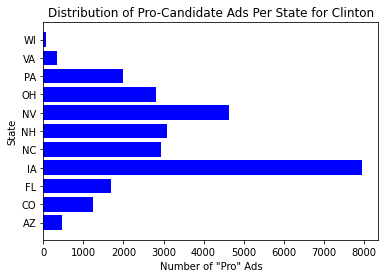

In [121]:
# Grouping by state for the Clinton dataframe and visualizing the distribution of Pro-Candidate ads per state for Clinton:
 
clinton_by_state_pro = clinton_pro.groupby('state').sum()

plt.barh(clinton_by_state_pro.index, clinton_by_state_pro['message'], color='blue')
plt.title('Distribution of Pro-Candidate Ads Per State for Clinton')
plt.ylabel('State')
plt.xlabel('Number of "Pro" Ads')
plt.show()

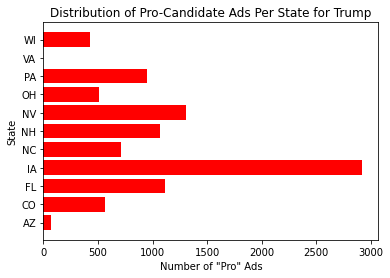

In [122]:
# Grouping by state for the Trump dataframe and visualizing the distribution of Pro-Candidate ads per state for Trump:
 
trump_by_state_pro = trump_pro.groupby('state').sum() 

plt.barh(trump_by_state_pro.index, trump_by_state_pro['message'], color='red')
plt.title('Distribution of Pro-Candidate Ads Per State for Trump')
plt.ylabel('State')
plt.xlabel('Number of "Pro" Ads')
plt.show()

In [123]:
# Creating a copy of the original joined dataframe to add a new column that reverses the binary values as 1 for con messages and 0 for pro messages: 

with_con = swing_states
cons = [1 if i==0 else 0 for i in swing_states['message']]

with_con['con_message'] = cons
with_con.head()

<ipython-input-123-9b029bc7d7b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_con['con_message'] = cons


,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner,con_message
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,0
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump,0
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,0
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump,0
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,0


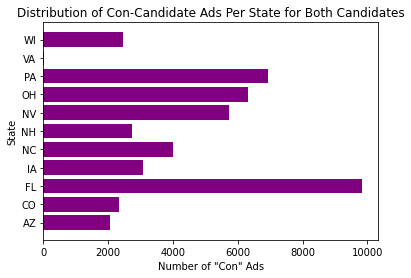

In [124]:
# Grouping the dataframe by state and visualizing the distribution of Con-Candidate ads per state for both candidates (Clinton and Trump) combined: 
# Since con corresponds to 1 and pro corresponds to 0 as binary int values, we can aggregate by the sum to find the total number of con messages: 

grouped_states_con = with_con.groupby('state').sum()

plt.barh(grouped_states_con.index, grouped_states_con['con_message'], color='purple')
plt.title('Distribution of Con-Candidate Ads Per State for Both Candidates')
plt.ylabel('State')
plt.xlabel('Number of "Con" Ads')
plt.show()

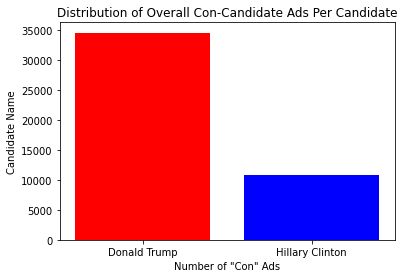

In [66]:

# Grouping the dataframe by candidate and visualizing the number of Con-Candidate ads for each of the candidates (Clinton and Trump): 

grouped_candidates_con = with_con.groupby('candidates').sum()

plt.bar(grouped_candidates_con.index, grouped_candidates_con['con_message'], color=['red', 'blue'])
plt.title('Distribution of Overall Con-Candidate Ads Per Candidate')
plt.ylabel('Candidate Name')
plt.xlabel('Number of "Con" Ads')
plt.show()

In [70]:
# Extracting dataframes corresponding to each of the candidates (Clinton and Trump) for purpose of the following visualizations:

clinton_con = with_con[with_con['candidates'] == 'Hillary Clinton']
trump_con = with_con[with_con['candidates'] == 'Donald Trump']

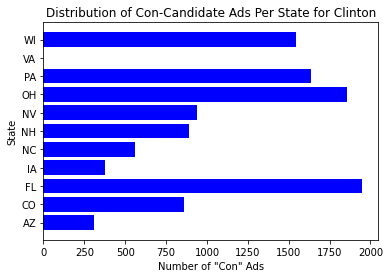

In [71]:
# Grouping by state for the Clinton dataframe and visualizing the distribution of Con-Candidate ads per state for Clinton:

clinton_by_state_con = clinton_con.groupby('state').sum()

plt.barh(clinton_by_state_con.index, clinton_by_state_con['con_message'], color='blue')
plt.title('Distribution of Con-Candidate Ads Per State for Clinton')
plt.ylabel('State') 
plt.xlabel('Number of "Con" Ads') 
plt.show()

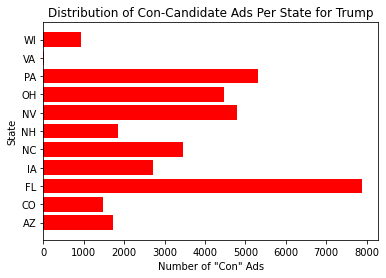

In [72]:
# Grouping by state for the Trump dataframe and visualizing the distribution of Con-Candidate ads per state for Trump:

trump_by_state_con = trump_con.groupby('state').sum()

plt.barh(trump_by_state_con.index, trump_by_state_con['con_message'], color='red')
plt.title('Distribution of Con-Candidate Ads Per State for Trump')
plt.ylabel('State')
plt.xlabel('Number of "Con" Ads')
plt.show()

In [73]:
raw_data.query("candidates == 'Donald Trump' and state == 'VA' and message == 'con'")

# raw_data.query("candidates == 'Hillary Clinton' and state == 'VA' and message == 'con' ").shape

,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,date_created,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner
46108,WSLS,"Roanoke-Lynchburg, VA",Meet the Press,news,2016-02-29 08:06:06 UTC,2016-02-29 08:07:06 UTC,Our Principles PAC,Super PAC,Immigration,Donald Trump,...,2016-09-12 14:57:31,60,VA,6343.0,4399.0,69.4,3973.0,62.6,swing,Hillary Clinton
46132,WSLS,"Roanoke-Lynchburg, VA",Meet the Press,news,2016-02-28 14:13:34 UTC,2016-02-28 14:14:34 UTC,Our Principles PAC,Super PAC,Immigration,Donald Trump,...,2016-09-12 14:57:31,60,VA,6343.0,4399.0,69.4,3973.0,62.6,swing,Hillary Clinton


In [75]:
# Pro-Messages Descriptive Analysis for all states:
print('Pro-Messages Descriptive Analysis for All States:')
print(grouped_states_pro['message'].describe())
print('\n')

# Con-Messages Descriptive Analysis for all states: 
print('Con-Messages Descriptive Analysis for All States:')
print(grouped_states_con['con_message'].describe())

Pro-Messages Descriptive Analysis for All States:
count       11.000000
mean      3356.454545
std       3037.607854
min        340.000000
25%       1174.500000
50%       2951.000000
75%       3912.000000
max      10889.000000
Name: message, dtype: float64


Con-Messages Descriptive Analysis for All States:
count      11.000000
mean     4138.272727
std      2798.666078
min         2.000000
25%      2403.500000
50%      3086.000000
75%      6027.000000
max      9844.000000
Name: con_message, dtype: float64


In [77]:
# Pro-Messages Descriptive Analysis for both candidates:
print('Pro-Messages Descriptive Analysis for Both Candidates:')
print(grouped_candidates_pro['message'].describe())
print('\n')

# Con-Messages Descriptive Analysis
print('Con-Messages Descriptive Analysis for Both Candidates:')
print(grouped_candidates_con['con_message'].describe())

Pro-Messages Descriptive Analysis for Both Candidates:
count        2.000000
mean     18460.500000
std      12457.100164
min       9652.000000
25%      14056.250000
50%      18460.500000
75%      22864.750000
max      27269.000000
Name: message, dtype: float64


Con-Messages Descriptive Analysis for Both Candidates:
count        2.000000
mean     22760.500000
std      16761.966248
min      10908.000000
25%      16834.250000
50%      22760.500000
75%      28686.750000
max      34613.000000
Name: con_message, dtype: float64


In [78]:
# Pro-Messages Descriptive Analysis for Clinton:
print('Pro-Messages Descriptive Analysis for Clinton:')
print(clinton_by_state_pro['message'].describe())
print('\n')

# Con-Messages Descriptive Analysis for Clinton: 
print('Con-Messages Descriptive Analysis for Clinton:')
print(clinton_by_state_con['con_message'].describe())

Pro-Messages Descriptive Analysis for Clinton:
count      11.000000
mean     2479.000000
std      2286.304748
min        65.000000
25%       858.000000
50%      1998.000000
75%      3020.000000
max      7967.000000
Name: message, dtype: float64


Con-Messages Descriptive Analysis for Clinton:
count      11.000000
mean      991.636364
std       665.839811
min         0.000000
25%       466.000000
50%       890.000000
75%      1588.500000
max      1950.000000
Name: con_message, dtype: float64


In [79]:
# Pro-Messages Descriptive Analysis for Clinton:
print('Pro-Messages Descriptive Analysis for Trump:')
print(trump_by_state_pro['message'].describe())
print('\n')

# Con-Messages Descriptive Analysis for Clinton: 
print('Con-Messages Descriptive Analysis for Trump:')
print(trump_by_state_con['con_message'].describe())

Pro-Messages Descriptive Analysis for Trump:
count      11.000000
mean      877.454545
std       797.539261
min         0.000000
25%       466.500000
50%       712.000000
75%      1095.000000
max      2922.000000
Name: message, dtype: float64


Con-Messages Descriptive Analysis for Trump:
count      11.000000
mean     3146.636364
std      2306.920253
min         2.000000
25%      1608.500000
50%      2711.000000
75%      4630.500000
max      7894.000000
Name: con_message, dtype: float64


In [80]:
# Correlation between message polarity and total percentage of voter registration or total percentage voted:
joined["message_polarity"] = joined['message'].replace({'pro': 1, "con": 0})

grouped = joined[joined.state_swing == 'swing'].groupby('state').agg({'message_polarity': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
print('Swing States Correlation between message polarity and total_percent_reg and percent_voted')
print(grouped.message_polarity.corr(grouped.total_percent_reg))
print(grouped.message_polarity.corr(grouped.percent_voted))
print()
print('Non-Swing States Correlation between message polarity and total_percent_reg and percent_voted')
grouped = joined[joined.state_swing != 'swing'].groupby('state').agg({'message_polarity': 'count', 'total_percent_reg': 'first', 'percent_voted': 'first'})
print(grouped.message_polarity.corr(grouped.total_percent_reg)) 
print(grouped.message_polarity.corr(grouped.percent_voted)) 

Swing States Correlation between message polarity and total_percent_reg and percent_voted
-0.28773315615512896
-0.404908754584072

Non-Swing States Correlation between message polarity and total_percent_reg and percent_voted
-0.7469814896480185
-0.6651937485478923


### News vs. not news per candidate (in swing states)

In [100]:
# Creating copy of dataframe with new column where 'news' = 1, 'not news'= 0

#filter by swing states
only_swing = joined[joined['state_swing']=='swing']


with_news = only_swing
news = [1 if i=='news' else 0 for i in only_swing['program_type']]

with_news['news_1'] = news
with_news.head()

<ipython-input-100-5120da6b5e89>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_news['news_1'] = news


,network,location,program,program_type,start_time,end_time,sponsors,sponsor_types,subjects,candidates,...,duration_seconds,state,total_pop,total_reg,total_percent_reg,total_voted,percent_voted,state_swing,winner,news_1
0,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,1
1,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NC,7631.0,5194.0,68.1,4700.0,61.6,swing,Donald Trump,1
2,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,1
3,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,FL,16202.0,9604.0,59.3,8578.0,52.9,swing,Donald Trump,0
4,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,...,30,NV,2234.0,1371.0,61.4,1195.0,53.5,swing,Hillary Clinton,1


In [101]:
# Extracting dataframes corresponding to each candidate (Clinton and Trump) & selecting columns 'program_type', 'state', and 'news_1
p_clinton = with_news[with_news['candidates'] == 'Hillary Clinton']
p_clinton = p_clinton[['program_type', 'state', 'news_1']]

p_trump = with_news[with_news['candidates'] == 'Donald Trump']
p_trump = p_trump[['program_type', 'state', 'news_1']]
p_trump

,program_type,state,news_1
1907,not news,CO,0
1908,news,OH,1
1909,news,WI,1
1911,not news,NV,0
1912,news,IA,1
...,...,...,...
100992,news,NC,1
100993,news,NC,1
100996,news,NC,1
101000,news,NC,1


In [102]:
############################### NEWS ################################ count per state
# Clinton
print('Clinton: count of news per state')
p_clinton_news = p_clinton[p_clinton.program_type == 'news']
c_news_count = p_clinton_news.groupby('state')['program_type'].count()
print(c_news_count)
print('\n')

# Trump
print('Trump: count of news per state')
p_trump_news = p_trump[p_trump.program_type == 'news']
t_news_count = p_trump_news.groupby('state')['program_type'].count()
print(t_news_count)

Clinton: count of news per state
state
AZ     440
CO    1221
FL    2429
IA    5201
NC    1842
NH    2996
NV    4420
OH    2950
PA    2516
VA     178
WI    1078
Name: program_type, dtype: int64


Trump: count of news per state
state
AZ     937
CO    1219
FL    6060
IA    3076
NC    2029
NH    2091
NV    4369
OH    3516
PA    4400
VA       2
WI     874
Name: program_type, dtype: int64


In [104]:
########################### NOT NEWS ################################ count per state
# Clinton
print('Clinton: count of not news per state')
p_clinton_news = p_clinton[p_clinton.program_type == 'not news']
c_notnews_count = p_clinton_news.groupby('state')['program_type'].count()
print(c_notnews_count)
print('\n')

# Trump
print('Trump: count of not news per state')
p_trump_news = p_trump[p_trump.program_type == 'not news']
t_notnews_count = p_trump_news.groupby('state')['program_type'].count()
print(t_notnews_count)

Clinton: count of not news per state
state
AZ     340
CO     882
FL    1220
IA    5426
NC    1948
NH    1783
NV    2432
OH    1786
PA    1304
VA     162
WI     529
Name: program_type, dtype: int64


Trump: count of not news per state
state
AZ     876
CO     845
FL    2952
IA    2565
NC    2142
NH     856
NV    1755
OH    1598
PA    2319
WI     498
Name: program_type, dtype: int64


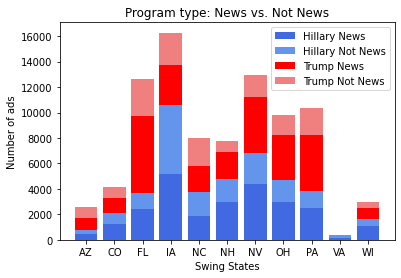

In [106]:
# TODO: This but on df not filtered on message (so include mixed, mix, etc.)
# file: joined_message_unfiltered.csv

x = ['AZ', 'CO', 'FL', 'IA', 'NC', 'NH', 'NV', 'OH', 'PA', 'VA', 'WI']
t_notnews_count_edit = [872, 844, 2952, 2565, 2142, 854, 1755, 1573, 2152, 0, 495]

# plot bars in stack manner
plt.bar(x, c_news_count.values, color='royalblue', label='Hillary News')
plt.bar(x, c_notnews_count.values, bottom=c_news_count.values, color='cornflowerblue', label='Hillary Not News')
plt.bar(x, t_news_count.values, bottom=c_news_count.values+c_notnews_count.values, color='red', label='Trump News') #Trump news
plt.bar(x, t_notnews_count_edit, bottom=t_news_count.values+c_notnews_count.values+c_news_count.values, color='lightcoral', label='Trump Not News') # Trump not news
plt.legend()
plt.xlabel("Swing States")
plt.ylabel("Number of ads")
plt.title("Program type: News vs. Not News")

In [130]:
## news vs. not news per candidaten in each state, which is more

voting_pct_winner = joined[['state', 'percent_voted', 'total_percent_reg', 'winner']]
voting_pct_winner = voting_pct_winner.drop_duplicates(keep='first')
voting_pct_winner.reset_index(inplace=True, drop=True)

# Hillary
diff_h = c_news_count.values - c_notnews_count.values
diff_hillary = pd.DataFrame({'state': x, 'Hillary diff': diff_h})

d_hillary = diff_hillary.merge(voting_pct_winner, on='state', how='left')
#print("Hillary difference")

h_win = []
for x in d_hillary['winner'].values:
    if x == 'Hillary Clinton':
        h_win.append('win')
    else:
        h_win.append('-')

d_hillary['result'] = h_win

display(d_hillary)

ValueError: ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [582]:
voting_pct_winner_1 = joined[['state', 'percent_voted', 'total_percent_reg', 'winner']]
voting_pct_winner_1 = voting_pct_winner_1.drop_duplicates(keep='first')
voting_pct_winner_1.reset_index(inplace=True, drop=True)

# Trump
diff_t = t_news_count.values - t_notnews_count_edit
diff_trump = pd.DataFrame({'state': x, 'news - not news counts': diff_t})
display(diff_trump)

d_trump = diff_trump.merge(voting_pct_winner_1, on='state', how='left')
print("Trump difference")

t_win = []
for x in d_trump['winner'].values:
    if x == 'Donald Trump':
        t_win.append('win')
    else:
        t_win.append('-')

d_trump['result'] = t_win
display(d_trump)

ValueError: ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

,state,news - not news counts
0,NaN,56
1,NaN,362
2,NaN,3108
3,NaN,503
4,NaN,-118
5,NaN,1210
6,NaN,2596
7,NaN,1823
8,NaN,1953
9,NaN,2


In [525]:
voting_pct_winner

,state,percent_voted,total_percent_reg,winner
0,NV,53.5,61.4,Hillary Clinton
1,NC,61.6,68.1,Donald Trump
2,FL,52.9,59.3,Donald Trump
3,OH,61.4,69.5,Donald Trump
4,IA,60.7,69.2,Donald Trump
5,PA,60.2,69.2,Donald Trump
6,CO,63.8,68.2,Hillary Clinton
7,WI,68.7,74.4,Donald Trump
8,CA,48.2,53.8,Hillary Clinton
9,AZ,53.3,60.5,Donald Trump
